# Credit Card Fraud Detection

# Introduction

Credit card fraud occurs when customers provide their credit card number to strangers, when cards are misplaced or stolen, when mail is misdirected and intercepted by thieves, or when company personnel duplicate a cardholder's card or card information. We will create a couple machine learning models in this notebook with anonymized credit card transaction data. Because fraudulent transactions are significantly less numerous than legitimate ones, fraud detection is a challenging task.


Thus, to overcome with the fraudster’s activity become very essential. Creating and 
implementing machine learning models for credit fraud detection is the major aim of our 
project. In this study, we are using machine learning algorithms such as Logistic Regression, 
Decision Tree, Random Forest and XG Boost Classifiers to predict the fraud detection. model 
performance was measured using different evaluation metrics such as Precision, Recall, 
Accuracy, F1-score for each Classifier. A confusion matrix is created for both training and 
testing sets to see the false positives and false negative and determine which evaluation 
metric will suites to Calculate the model performance. Further to reduce the overfitting, 
different hyperparameters are tuned



# About Data

This dataset contains total of 284807 rows × 31 columns of Customers Data .Target variable is Class we need to predict, whether Transaction is Fraud or Non-Fraud. This dataset was downloaded from Kaggle.

# Importing Neccessary Libaries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
credit_data= pd.read_csv("creditcard.csv")


In [4]:
credit_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
credit_data.shape

(284807, 31)

In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
duplicated_values = credit_data[credit_data.duplicated()]
print(duplicated_values)

            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  .

In [8]:
credit_data.drop_duplicates(inplace=True)

In [9]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [10]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [11]:
print(credit_data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [12]:
credit_data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

# Exploratory Data Analysis

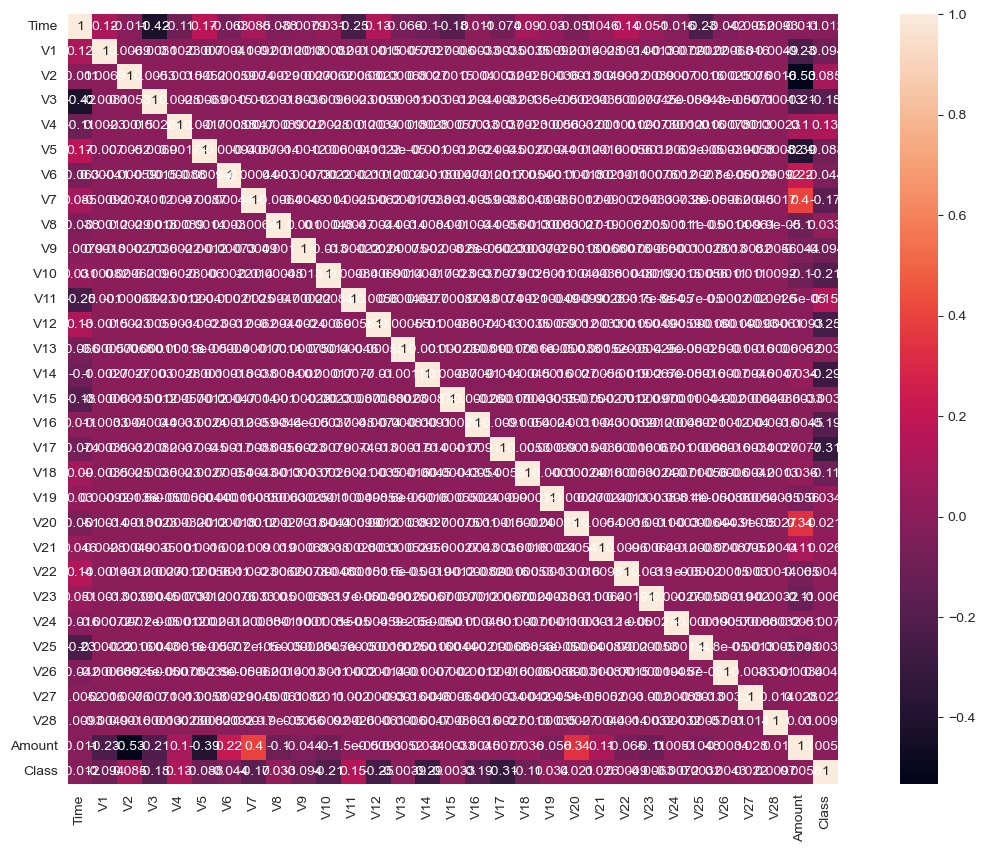

In [89]:
correlation =  credit_data.corr()
plt.figure ( figsize = (16, 10))
sns.heatmap( correlation, annot = True, square=True)
plt.show()

In [82]:
importance_df = pd.DataFrame({
    'feature' : x_train.columns,
    'importance':DecisionTree_model.feature_importances_
}).sort_values('importance', ascending=False)

In [84]:
importance_df.head(10)

,feature,importance
14,V14,0.972061
4,V4,0.027939
0,Time,0.000000
16,V16,0.000000
28,V28,0.000000
27,V27,0.000000
26,V26,0.000000
25,V25,0.000000
24,V24,0.000000
23,V23,0.000000


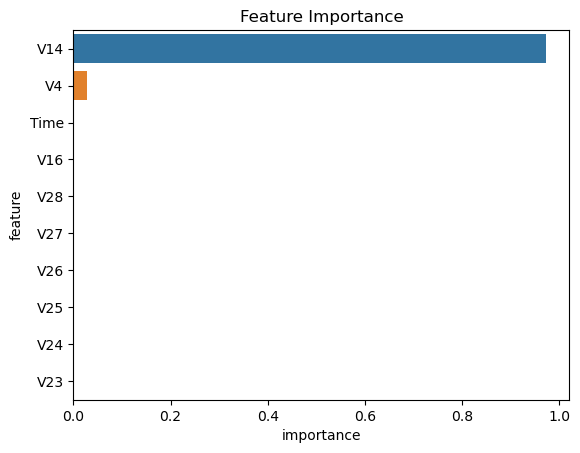

In [83]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance',y='feature');

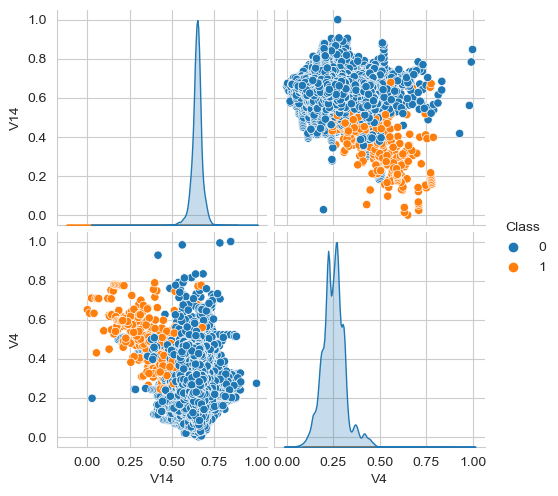

In [86]:
sns.set_style('whitegrid')
sns.pairplot(credit_data, vars= ('V14', 'V4',), hue= 'Class');

# Splitting the Data set into Training and Test Set

Before building any real-world machine learning models, it is a common method to split the data set into training set and test set. We train the model using the training set, we give inputs to our model which will be randomly initialized with some weights, then we take outputs from that model and compare with actual targets and compute the loss using loss function. We will not use the training set to predict new data, it will not be accurate. for this reason, we use test set. The test set- it’s a fraction of the dataset which is not to train the model but to evaluate the model to see how well the model is performing.

In [13]:
x_train, x_test= train_test_split(credit_data, test_size=0.2 , random_state=42)

In [14]:
x_train.shape

(226980, 31)

In [15]:
x_test.shape

(56746, 31)

# Identifying Input & Target Columns

 we separate our target column ‘Class’, from the input column. We don’t use the target column 
as an input column because we compare input columns with target column to see how well our 
model is performing.

In [16]:
x_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [17]:
input_columns= (x_train.columns)[0:30]
target_column= 'Class'

In [18]:
input_columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [19]:
target_column

'Class'

In [20]:
train_inputs = x_train[input_columns]
train_targets = x_train[target_column]

In [21]:
train_targets

79119     0
265736    0
42801     0
172689    0
179949    0
         ..
120348    0
260136    0
132427    0
147428    0
122429    0
Name: Class, Length: 226980, dtype: int64

In [22]:
train_inputs

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
79119,57873.0,-1.353894,-1.081034,1.787587,-1.803254,-0.235223,2.177295,1.014795,0.549627,0.629906,...,0.420106,0.182520,0.367052,0.805029,-0.981966,-0.783392,0.905245,-0.176870,-0.093081,318.00
265736,162025.0,-0.059936,0.582525,-1.369698,-1.100370,3.707608,3.396709,1.218666,0.541196,-0.507983,...,-0.103629,0.069615,0.311566,-0.268906,0.690685,0.463247,-0.637914,-0.121454,-0.196513,33.32
42801,41251.0,-0.362164,0.715165,1.783253,0.230848,-0.240500,-0.508633,0.589763,-0.013746,-0.048097,...,-0.036132,-0.212595,-0.515372,-0.044853,0.385330,-0.126762,0.139889,0.031010,0.057977,19.99
172689,121201.0,-0.370982,0.446004,-0.732017,-1.088288,1.799175,-1.117223,1.502962,-0.553382,-0.240976,...,-0.233555,0.263039,0.937860,-0.198459,0.728053,0.203829,-0.522782,-0.376116,-0.103404,6.30
179949,124306.0,0.695644,0.177228,0.481414,-0.338853,-0.122807,0.074431,-0.509006,-0.775719,0.982836,...,-0.275961,0.956704,0.468104,-0.195806,0.709315,0.487912,-0.246186,0.196872,0.197452,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120348,75794.0,-0.188193,-3.244306,-1.083455,0.136170,-1.626809,-0.517792,0.786109,-0.401554,-0.642671,...,1.137602,0.011795,-1.341362,-0.791988,-0.064471,0.141139,1.038062,-0.238098,0.136452,849.40
260136,159419.0,0.149260,0.988698,-0.605170,-0.788264,1.238822,-0.203064,0.861209,0.067349,-0.279204,...,0.045101,-0.326673,-0.816542,0.008957,-0.010456,-0.377837,0.128193,0.219217,0.068558,0.89
132427,79983.0,1.259310,-0.049484,-0.721776,0.071903,1.864771,3.635628,-0.821682,0.929256,0.128685,...,-0.003257,0.070189,0.104264,-0.107993,1.004823,0.674600,-0.275199,0.045933,0.025074,4.50
147428,88536.0,1.982903,-0.134427,-1.161183,0.472515,-0.043755,-1.080473,0.306983,-0.373167,0.454594,...,-0.110161,-0.212230,-0.472417,0.248672,0.025584,-0.195097,0.272711,-0.071660,-0.055715,39.48


In [23]:
test_inputs = x_test[input_columns]
test_targets = x_test[target_column]

# identifying numeric and categorical columns


The reason behind separating numeric and categorical columns is because, later we need to convert categorical data into numeric data to train any machine learning model. Any machine model will not take categorical data.

In [24]:
numeric_cols = list(train_inputs.select_dtypes(include=[np.number]).columns.values)
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [25]:
numeric_cols

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [26]:
categorical_cols

[]

# Scaling Nummeric Features

As we can see in our dataset, certain features have high values which are in the thousands, but some values are very less. so values that have a high magnitude tend to dominate the loss, a low range of values will not show up in the loss. In order to avoid this, we make all the features into the same range of values using the scaling method. Here we are using a Min-Max Scaler to compute the range of values from zero to one for each numeric column so that every column will be scaled proportionately.

In [27]:
scaler = MinMaxScaler()

In [28]:
scaler.fit(credit_data[numeric_cols])

MinMaxScaler()

In [29]:
credit_data[numeric_cols] = scaler.transform(credit_data[numeric_cols])

In [30]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [31]:
train_inputs[numeric_cols].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,...,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000
mean,0.548549,0.958367,0.767228,0.837437,0.251832,0.765733,0.263002,0.265365,0.785390,0.462714,...,0.580269,0.561474,0.509970,0.665436,0.382245,0.577940,0.425541,0.416547,0.313138,0.003445
std,0.274869,0.033099,0.017401,0.026214,0.062755,0.009348,0.013423,0.007559,0.012657,0.037754,...,0.008182,0.011645,0.033810,0.009340,0.081519,0.029298,0.078961,0.007328,0.006652,0.009825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313487,0.942701,0.760933,0.821993,0.214261,0.761083,0.255283,0.261993,0.783147,0.440585,...,0.578013,0.557795,0.484692,0.663031,0.334555,0.560089,0.371971,0.415207,0.312052,0.000218
50%,0.489950,0.958635,0.767942,0.840561,0.250941,0.765360,0.260241,0.265599,0.785624,0.460966,...,0.579602,0.561005,0.510305,0.665267,0.387742,0.578922,0.417011,0.416537,0.313353,0.000856
75%,0.806057,0.980642,0.775709,0.855189,0.284787,0.769857,0.266997,0.268830,0.788889,0.483300,...,0.581685,0.564471,0.534604,0.667623,0.441372,0.597649,0.464884,0.418193,0.314714,0.003010
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.995501,1.000000,...,1.000000,0.926040,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
test_inputs[numeric_cols]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
104697,0.400453,0.976206,0.759189,0.840189,0.281435,0.773212,0.310994,0.255994,0.799400,0.516693,...,0.580808,0.559914,0.508643,0.662885,0.523344,0.617120,0.389848,0.418393,0.313939,0.002196
134356,0.467435,0.876660,0.813170,0.821538,0.212001,0.759854,0.255148,0.267354,0.791634,0.557490,...,0.603266,0.547705,0.474658,0.667617,0.379367,0.608929,0.426807,0.424482,0.304271,0.000382
42637,0.238333,0.931964,0.764503,0.864382,0.161595,0.763250,0.249604,0.266363,0.785109,0.412046,...,0.576567,0.554940,0.465667,0.663239,0.439381,0.582501,0.605713,0.407240,0.308074,0.001794
882,0.003854,0.961969,0.774256,0.860002,0.259432,0.762995,0.257819,0.265130,0.776394,0.444568,...,0.578296,0.570391,0.465191,0.665216,0.453107,0.620055,0.448569,0.417344,0.315708,0.000139
263275,0.931004,0.953650,0.775970,0.847043,0.268993,0.774763,0.282969,0.267316,0.790859,0.432071,...,0.582099,0.567065,0.564280,0.657154,0.261479,0.606172,0.516128,0.418894,0.314089,0.000111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154645,0.592435,0.945209,0.776094,0.882086,0.461649,0.765871,0.270295,0.265359,0.787617,0.449305,...,0.584407,0.563553,0.524651,0.664640,0.373237,0.584289,0.512211,0.417200,0.315192,0.003730
107561,0.407988,0.976165,0.758446,0.851303,0.282970,0.756364,0.259357,0.261796,0.784765,0.448111,...,0.577072,0.558759,0.503529,0.663047,0.433210,0.604390,0.386975,0.417486,0.314257,0.005255
185406,0.732956,0.991875,0.764012,0.821065,0.253615,0.764189,0.256206,0.264433,0.784851,0.478161,...,0.578373,0.554611,0.445368,0.672544,0.317250,0.536207,0.429598,0.414968,0.311923,0.001284
59492,0.282797,0.909910,0.742610,0.867095,0.241421,0.767878,0.255069,0.266840,0.782250,0.501570,...,0.564330,0.552595,0.530607,0.693406,0.465103,0.548002,0.538932,0.421273,0.305844,0.003572


In [33]:
X_train = train_inputs[numeric_cols]

In [34]:
X_test = test_inputs[numeric_cols]

# Balancing the Data set using SMOTE OverSampling Technique

The dataset has an imbalance in the classes. The imbalance in the data causes the ML model not to learn the patterns in the data effectively. During the prediction phase, the model makes biased predictions which leads to a decrease in the overall performance of the model. Therefore it becomes very important to handle the imbalanced data. There are different techniques to handle the imbalanced data. One such method is Smote Over-sampling technique to generate new data points to balance the class variables.

By interpolating between the instances of the minority class that already exist, the SMOTE method creates synthetic samples for the minority class. This enhances model performance and balances the dataset. Helpful when expanding the minority class's data set while preventing overfitting is necessary.

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
oversample = SMOTE(random_state=2)

In [37]:
x_train , x_train_targets = oversample.fit_resample(X_train , train_targets)

In [38]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.334929,0.935293,0.755852,0.868390,0.171993,0.764133,0.284910,0.271538,0.791281,0.484479,...,0.584738,0.564422,0.527154,0.677389,0.249915,0.533933,0.573318,0.413246,0.311235,0.012378
1,0.937688,0.957276,0.773405,0.813679,0.203152,0.790676,0.297171,0.272780,0.791191,0.445281,...,0.579162,0.562602,0.524566,0.661440,0.475304,0.603910,0.321246,0.414269,0.309136,0.001297
2,0.238732,0.952141,0.774804,0.868315,0.262163,0.764097,0.257906,0.268948,0.785238,0.461123,...,0.579881,0.558052,0.485989,0.664767,0.434157,0.570791,0.448299,0.417083,0.314300,0.000778
3,0.701427,0.951991,0.771964,0.824729,0.203687,0.777828,0.251787,0.274512,0.779449,0.454479,...,0.577779,0.565720,0.553782,0.662486,0.480339,0.589348,0.340053,0.409569,0.311025,0.000245
4,0.719397,0.970112,0.769128,0.845756,0.236909,0.764890,0.263768,0.262255,0.777064,0.496637,...,0.577327,0.576902,0.531868,0.662526,0.477814,0.605294,0.385234,0.420145,0.317131,0.000389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453189,0.284144,0.839650,0.797817,0.695877,0.480624,0.728748,0.262503,0.222752,0.779199,0.328077,...,0.581102,0.550812,0.556897,0.682071,0.309640,0.583312,0.416994,0.443297,0.315493,0.014368
453190,0.543866,0.765707,0.841557,0.567747,0.537515,0.700643,0.222841,0.169198,0.813438,0.298626,...,0.583467,0.573242,0.565728,0.657883,0.468887,0.516391,0.368459,0.399544,0.311687,0.000597
453191,0.915621,0.982330,0.764774,0.820897,0.231684,0.764972,0.259245,0.261934,0.786444,0.457391,...,0.580754,0.562965,0.524256,0.667489,0.462464,0.559051,0.425479,0.417383,0.312993,0.000570
453192,0.879457,0.950755,0.805728,0.740505,0.500667,0.776895,0.240122,0.259814,0.792541,0.335612,...,0.584017,0.566336,0.486573,0.664309,0.300378,0.547246,0.436908,0.425526,0.319121,0.000000


In [39]:
x_train_targets

0         0
1         0
2         0
3         0
4         0
         ..
453189    1
453190    1
453191    1
453192    1
453193    1
Name: Class, Length: 453194, dtype: int64

In [40]:
x_train_targets.value_counts()

0    226597
1    226597
Name: Class, dtype: int64

In [41]:
x_test , x_test_targets = oversample.fit_resample(X_test , test_targets)

In [42]:
x_test_targets.value_counts()

0    56656
1    56656
Name: Class, dtype: int64

# Applying Machine Learning Models

# Logistic Regression Model

Logistic regression is a common technique for solving binary Classification problems.

Logistic regression is a supervised machine learning algorithm for solving binary classification problems. The models estimate two possibles outcomes: yes/no, 0 /1, true/false by analysing the relationship between one or more independent variables and classifies data into discrete classes

First, we initialize the model with some random parameters for the weight and bais, then we pass the inputs (training data) into the model Using model.fit, and make predictions out of it, then we take those predictions and compare them with actual targets to find the accuracy of the model. If the model is badly overfitted, we use some optimization techniques to reduce the loss and improve the weights of the model till the model is rightly fitted.

Lib-linear solver was used here. There are many other solvers you can try like Newton-cg, LBFGS, SAG, and SAGA.

Logistic model uses a function called sigmoid function to make predictions and probabilities. the sigmoid function refers to an S-shaped curve that converts any real value to a range between 0 and 1. For example, if the sigmoid function is greater than 0.5, the output is classifying as 1. If less than 0.5, the output is classifying as 0. In simple terms, if the model output of the sigmoid function is 0.75, it indicates that there are 75% chances stroke will occur.

In [43]:
LogisticRegression_model = LogisticRegression(solver= 'liblinear')

In [44]:
LogisticRegression_model.fit (x_train, x_train_targets)

LogisticRegression(solver='liblinear')

In [45]:
LogisticRegression_model.score(x_train, x_train_targets)

0.9479538564058659

# Confusion Matrix

Once the data has been cleaned, pre-processed, and organized, the first thing we do is feed it into a superior model, from which we naturally obtain output in probabilities.

But hang on! How the devil can we quantify our model's efficacy? We want better performance and greater effectiveness, and that is precisely what we want. The Confusion matrix is now visible at this location.

The confusion matrix is a performance metric used in machine learning classification. Among its many practical applications are measuring recall, precision, F1 Score & Accuracy.

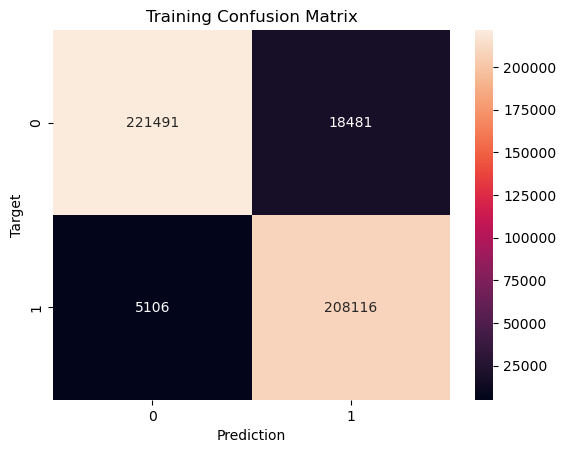

logistic Regression Classification Report for Training Set

              precision    recall  f1-score   support

           0       0.92      0.98      0.95    226597
           1       0.98      0.92      0.95    226597

    accuracy                           0.95    453194
   macro avg       0.95      0.95      0.95    453194
weighted avg       0.95      0.95      0.95    453194



In [46]:
train_preds = LogisticRegression_model.predict(x_train)
cm = confusion_matrix(train_preds,x_train_targets)
plt.figure()
sns.heatmap(cm , annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Training Confusion Matrix')
plt.show() 

print('logistic Regression Classification Report for Training Set')
print()
print(classification_report(x_train_targets, train_preds))

In [47]:
LogisticRegression_model.score(x_test, x_test_targets)

0.9244916690200509

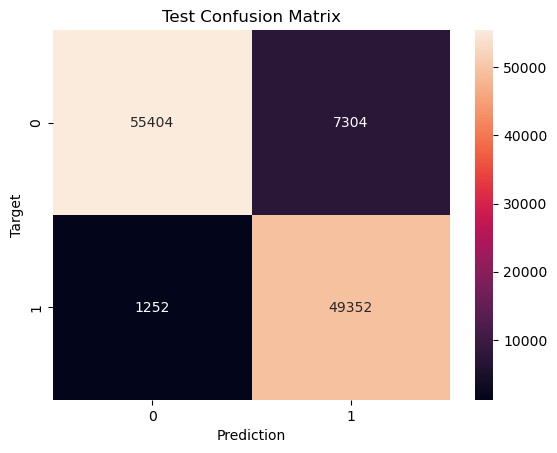

logistic Regression Classification Report for Test Set

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     56656
           1       0.98      0.87      0.92     56656

    accuracy                           0.92    113312
   macro avg       0.93      0.92      0.92    113312
weighted avg       0.93      0.92      0.92    113312



In [48]:
test_preds = LogisticRegression_model.predict(x_test)
cm = confusion_matrix(test_preds,x_test_targets)
plt.figure()
sns.heatmap(cm , annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix')
plt.show() 

print('logistic Regression Classification Report for Test Set')
print()
print(classification_report(x_test_targets, test_preds))

# Decision Tree model¶

Randomization is important factor to determine how decision tree work. We need to provide a random state to get same kind of result each time when you run the model, if you don’t want to, default will be zero. It generally recommends to use a random state, if you want to replicate the results or else it will not.

In [49]:
DecisionTree_model = DecisionTreeClassifier(random_state=42)

In [50]:
DecisionTree_model.fit(x_train, x_train_targets)

DecisionTreeClassifier(random_state=42)

In [51]:
DecisionTree_model.score (x_train , x_train_targets)

1.0

In [52]:
DecisionTree_model.score (x_test , x_test_targets)

0.878680104490257

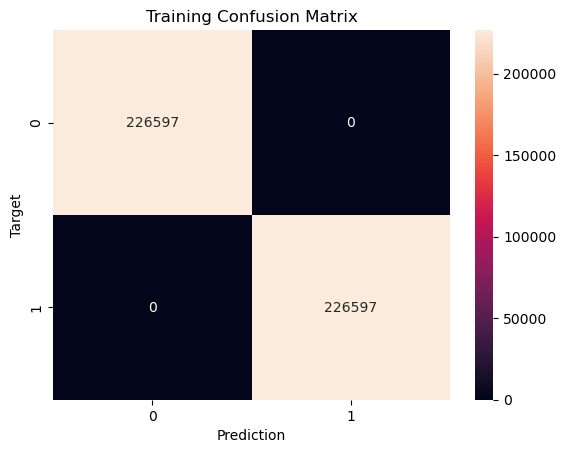

Decision Tree Classification Report for training set


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       1.00      1.00      1.00    226597

    accuracy                           1.00    453194
   macro avg       1.00      1.00      1.00    453194
weighted avg       1.00      1.00      1.00    453194



In [53]:
train_preds = DecisionTree_model.predict(x_train)
cm = confusion_matrix(train_preds, x_train_targets)
plt.figure()
sns.heatmap(cm , annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Training Confusion Matrix')
plt.show()

print('Decision Tree Classification Report for training set')
print()
print()
print(classification_report(x_train_targets, train_preds))

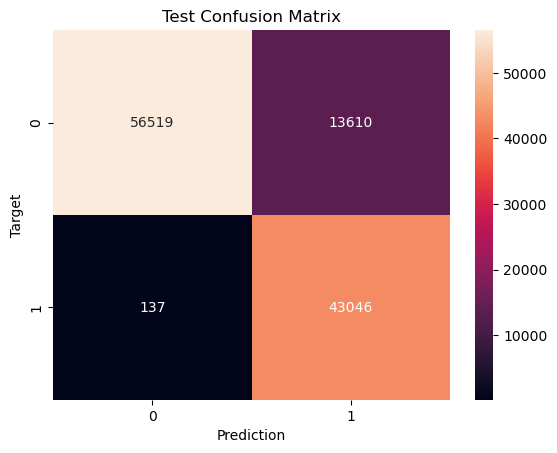

Decision Tree Classification Report for test set


              precision    recall  f1-score   support

           0       0.81      1.00      0.89     56656
           1       1.00      0.76      0.86     56656

    accuracy                           0.88    113312
   macro avg       0.90      0.88      0.88    113312
weighted avg       0.90      0.88      0.88    113312



In [54]:
test_preds = DecisionTree_model.predict(x_test)
cm = confusion_matrix(test_preds, x_test_targets)
plt.figure()
sns.heatmap(cm , annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix')
plt.show()

print('Decision Tree Classification Report for test set')
print()
print()
print(classification_report(x_test_targets, test_preds))

# HyperParameter Tuning to Reduce Overfitting

We have several hyperparameters but we pick some best hyperparameters. And we need to understand what each hyperparameter does. How it fits on overfitting curve and to experiment and find out optimal value for each hyperparameter to increase the model accuracy.

If Training set leads to 100% accuracy, while test set was only 79%, which shows the how badly model is overfitted. Overfitting means, you’re getting high accuracy on training set and very low accuracy on test set.

Reducing overfitting is called regularization. We have several techniques for regularization. We can pass on arguments like random state, specify criteria which can be Gini or entropy. You have max depth parameter to specify the maximum depth of the tree.

In [59]:
DecisionTree_model = DecisionTreeClassifier(mavcl, random_state=42)

In [60]:
DecisionTree_model.fit(x_train, x_train_targets)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=3, random_state=42)

In [61]:
DecisionTree_model.score (x_train , x_train_targets)

0.9268017670136851

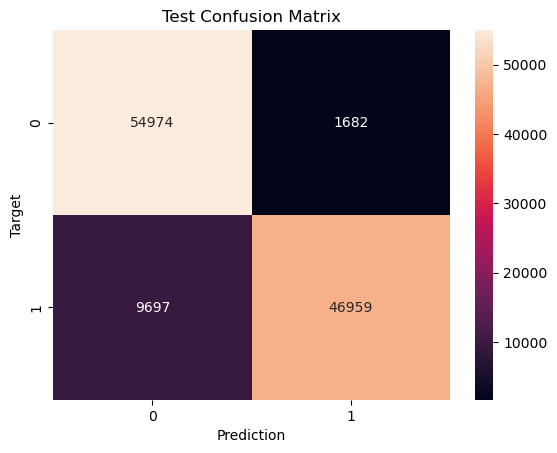

Decision Tree Classification Report for Test set


              precision    recall  f1-score   support

           0       0.85      0.97      0.91     56656
           1       0.97      0.83      0.89     56656

    accuracy                           0.90    113312
   macro avg       0.91      0.90      0.90    113312
weighted avg       0.91      0.90      0.90    113312



In [62]:
test_preds = DecisionTree_model.predict(x_test)
cm = confusion_matrix(x_test_targets, test_preds )
plt.figure()
sns.heatmap(cm , annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix')
plt.show()

print('Decision Tree Classification Report for Test set')
print()
print()
print(classification_report(x_test_targets, test_preds ))

# Random Forest¶

Random forests combine several decision trees upon averaging all of them to make better predictions. the general technique of combining several decision trees is called ensemble. It cancels out most of the errors upon averaging them.

Single decision tree can make many errors but combining several decisions trees, many of the errors will cancel out with tuning with several hyperparameters will give better predictions than decision tress.

In [63]:
Randomforest_model = RandomForestClassifier(random_state=42)

In [64]:
Randomforest_model.fit(x_train, x_train_targets) 

RandomForestClassifier(random_state=42)

In [65]:
Randomforest_model.score(x_train, x_train_targets)

1.0

In [66]:
Randomforest_model.score(x_test, x_test_targets)

0.8955450437729455

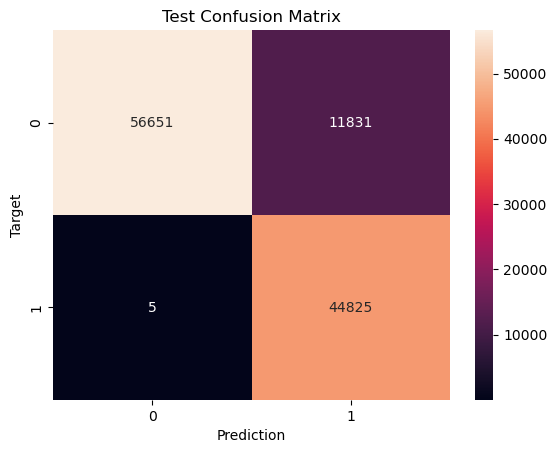

Random Forest Classification Report for Test set


              precision    recall  f1-score   support

           0       0.83      1.00      0.91     56656
           1       1.00      0.79      0.88     56656

    accuracy                           0.90    113312
   macro avg       0.91      0.90      0.89    113312
weighted avg       0.91      0.90      0.89    113312



In [67]:
test_preds = Randomforest_model.predict(x_test)
cm = confusion_matrix(test_preds, x_test_targets)
plt.figure()
sns.heatmap(cm , annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix')
plt.show()


print('Random Forest Classification Report for Test set')
print()
print()
print(classification_report(x_test_targets, test_preds))

# HyperParameter Tuning to Reduce Overfitting


In [68]:
Randomforest_model =RandomForestClassifier(max_depth = 5, max_leaf_nodes=3, random_state=42)

In [70]:
Randomforest_model.fit(x_train, x_train_targets) 

RandomForestClassifier(max_depth=5, max_leaf_nodes=3, random_state=42)

In [71]:
Randomforest_model.score(x_train, x_train_targets)

0.9284611005441379

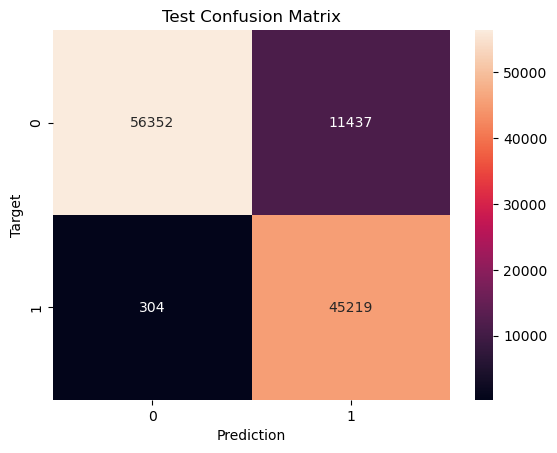

Random Forest Classification Report for Test set


              precision    recall  f1-score   support

           0       0.83      0.99      0.91     56656
           1       0.99      0.80      0.89     56656

    accuracy                           0.90    113312
   macro avg       0.91      0.90      0.90    113312
weighted avg       0.91      0.90      0.90    113312



In [72]:
test_preds = Randomforest_model.predict(x_test)
cm = confusion_matrix(test_preds, x_test_targets)
plt.figure()
sns.heatmap(cm , annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix')
plt.show()


print('Random Forest Classification Report for Test set')
print()
print()
print(classification_report(x_test_targets, test_preds))

# Gradient Boosting Classifier

A machine learning ensemble technique called gradient boosting successively combines the predictions of several weak learners, usually decision trees. By refining the model's weights based on the mistakes of earlier iterations, it seeks to enhance overall predictive performance by progressively lowering prediction errors and raising the model's accuracy.

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
GB_model = GradientBoostingClassifier(random_state=42)

In [75]:
GB_model.fit(x_train, x_train_targets)

GradientBoostingClassifier(random_state=42)

In [76]:
GB_model.score(x_train, x_train_targets)

0.9851211622395707

In [77]:
GB_model.score(x_test, x_test_targets)

0.9412330556340017

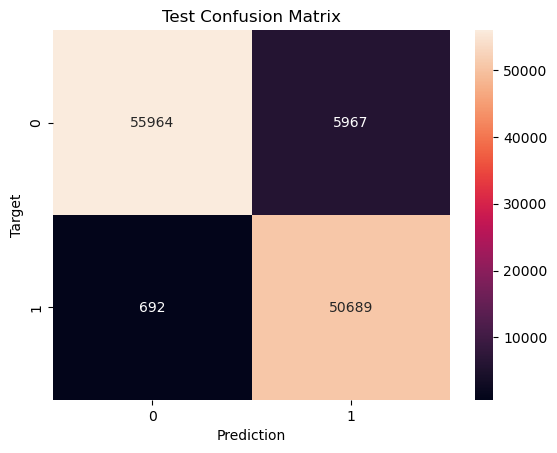

GB Classification Report for Test set


              precision    recall  f1-score   support

           0       0.90      0.99      0.94     56656
           1       0.99      0.89      0.94     56656

    accuracy                           0.94    113312
   macro avg       0.95      0.94      0.94    113312
weighted avg       0.95      0.94      0.94    113312



In [78]:
test_preds = GB_model.predict(x_test)
cm = confusion_matrix(test_preds, x_test_targets)
plt.figure()
sns.heatmap(cm , annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix')
plt.show()


print('GB Classification Report for Test set')
print()
print()
print(classification_report(x_test_targets, test_preds))

# HyperParameter Tuning to Reduce Overfitting

In [90]:
GB_model = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 5, max_leaf_nodes=3, random_state=42)

In [91]:
GB_model.fit(x_train, x_train_targets)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=3, random_state=42)

In [92]:
GB_model.score(x_train, x_train_targets)

0.9586975997034383

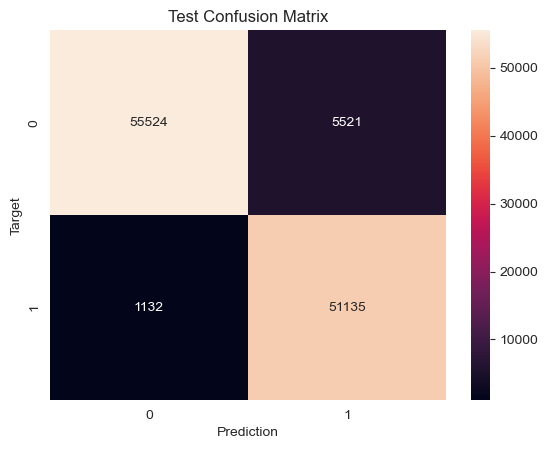

GB Classification Report for Test set


              precision    recall  f1-score   support

           0       0.91      0.98      0.94     56656
           1       0.98      0.90      0.94     56656

    accuracy                           0.94    113312
   macro avg       0.94      0.94      0.94    113312
weighted avg       0.94      0.94      0.94    113312



In [93]:
test_preds = GB_model.predict(x_test)
cm = confusion_matrix(test_preds, x_test_targets)
plt.figure()
sns.heatmap(cm , annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix')
plt.show()


print('GB Classification Report for Test set')
print()
print()
print(classification_report(x_test_targets, test_preds))

# Conclusion

A variety of machine learning models were used in this study to detect credit card fraud. To 
determine the insights and correlation between the variables, a thorough EDA was conducted. 

In order to improve the model's performance, the class imbalance issue in our dataset was 
addressed using the SMOTE Oversampling technique. In order to decrease overfitting and 
improve model performance, we have adjusted the models using a variety of hyperparameters 
and determined which hyperparameters are best for each model.  

The metric that best suited our dataset to calculate the model performance score was 
precision and recall. due to the high cost of false negatives  

From the experiments, with SMOTE oversampling technique and tuned the models with 
different hyperparameters, XG Boost Classifier was performed better other all other models 
with SMOTE oversampling With the Precision & Recall score of  98% and 90%.